# Read data

In [1]:
import pandas as pd 
from datetime import datetime, timedelta
import folium
from folium.plugins import HeatMapWithTime
import numpy as np
from folium.plugins import HeatMap

import io
from PIL import Image

import urllib.request

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

from shapely.geometry import Polygon, Point
import json
from shapely.geometry import shape, GeometryCollection

%matplotlib inline

# Fetch latest file

In [4]:
confirm_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSr2xYotDgnAq6bqm5Nkjq9voHBKzKNWH2zvTRx5LU0jnpccWykvEF8iB_0g7Tzo2pwzkTuM3ETlr_h/pub?gid=0&range=A2:ZZ&output=csv'
highrisk_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT6aoKk3iHmotqb5_iHggKc_3uAA901xVzwsllmNoOpGgRZ8VAA3TSxK6XreKzg_AUQXIkVX5rqb0Mo/pub?gid=0&range=A2:ZZ&output=csv'

case_fname = 'case.csv'
highrisk_fname = 'location.csv'



In [ ]:
f_case = open(case_fname, "w", encoding='UTF-8')
f_highrisk = open(highrisk_fname, "w", encoding='UTF-8')

with urllib.request.urlopen(highrisk_url) as f:
    html = f.read().decode('utf-8')
    f_highrisk.write(html)

with urllib.request.urlopen(confirm_url) as f:
    html = f.read().decode('utf-8')
    f_case.write(html)
    
f_case.close()
f_highrisk.close()

# Utility function

In [2]:
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

## Case file

In [5]:
data_master = pd.read_csv(case_fname, encoding='utf8') 
# Preview the first 5 lines of the loaded data 
data_master.head()

,enabled,case_no,onset_date,confirmation_date,gender,age,hospital_zh,hospital_en,status,status_zh,...,citizenship_en,citizenship_district_zh,citizenship_district_en,classification,classification_zh,classification_en,detail_zh,detail_en,source_url_1,source_url_2
0,Y,1.0,2020-01-21,2020-01-23,M,39,瑪嘉烈醫院,Princess Margaret Hospital,discharged,出院,...,Wuhan,境外,Outside HK,imported,輸入個案,Imported,1 月 21 日搭高鐵來港，同日出現發燒及鼻塞，於西九龍站被發現發燒，即時送院。同行 4 名...,The patient travelled to Hong Kong via high-sp...,https://www.thestandnews.com/society/%E6%AD%A6...,NaN
1,Y,2.0,2020-01-18,2020-01-23,M,56,瑪嘉烈醫院,Princess Margaret Hospital,discharged,出院,...,Ma On Shan,沙田,Sha Tin,imported,輸入個案,Imported,1 月 10 日獨自前往武漢，1 月 19 日由武漢乘坐航班前往深圳，再經羅湖乘東鐵轉馬鐵返...,The patient travelled to Wuhan on Jan 10. He f...,https://hd.stheadline.com/news/realtime/hk/168...,NaN
2,Y,3.0,2020-01-20,2020-01-24,F,62,瑪嘉烈醫院,Princess Margaret Hospital,discharged,出院,...,Wuhan,境外,Outside HK,imported,輸入個案,Imported,1 月 19 日乘搭高鐵由武漢到港，入住屯門倚嶺南庭。自 1 月 20 日起出現病徵，1 月...,The female patient took a high-speed rail trai...,https://news.rthk.hk/rthk/ch/component/k2/1504...,NaN
3,Y,4.0,2020-01-23,2020-01-24,F,62,瑪嘉烈醫院,Princess Margaret Hospital,discharged,出院,...,Wuhan,境外,Outside HK,imported,輸入個案,Imported,62 歲女患者與丈夫於 1 月 24 日從武漢來港探望居住在馬鞍山銀湖天峰的女兒。二人與女兒...,The 62 year-old female patient came from Wuhan...,https://www.thestandnews.com/politics/%E6%AD%A...,NaN
4,Y,5.0,2020-01-23,2020-01-24,M,63,瑪嘉烈醫院,Princess Margaret Hospital,discharged,出院,...,Wuhan,境外,Outside HK,imported,輸入個案,Imported,男患者與妻子於 1 月 24 日從武漢來港探望居住在馬鞍山銀湖天峰的女兒，到醫院求醫，夫婦須...,The 63 year-old male patient came from Wuhan w...,https://www.thestandnews.com/politics/%E6%AD%A...,NaN


# Useful data visualization

The case category is interesting but we lack of history data

In [39]:
df_group = data_master.loc[:, ['status_en']]

In [43]:
count_case = df_group.groupby('status_en').size()
count_case

status_en
Critical               31
Deceased              112
Discharged           5567
No admission           30
Pending admission       1
Serious                31
Stable                932
dtype: int64

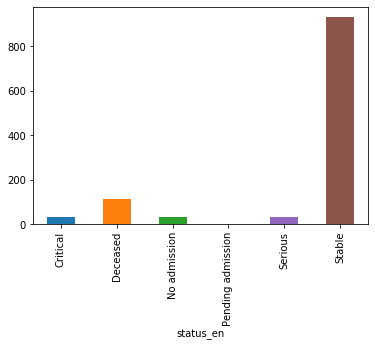

In [47]:
new_count_case = count_case.drop(['Discharged'])
ax = new_count_case.plot.bar()

In [6]:
df_city_group = data_master.loc[:, ['citizenship_district_en']]
city_case = df_city_group.groupby('citizenship_district_en').size()

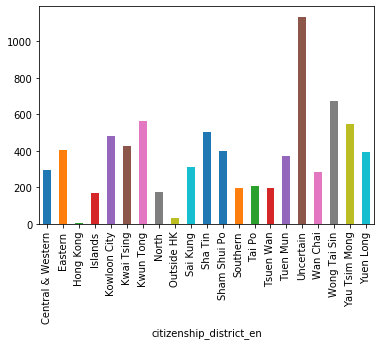

In [7]:
ax = city_case.plot.bar()

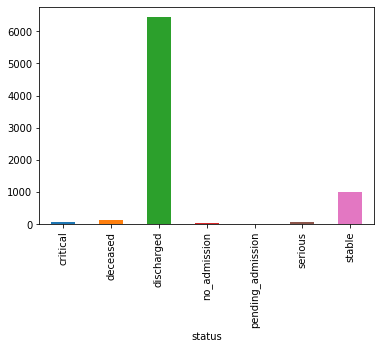

In [9]:
df_city_group = data_master.loc[:, ['status']]
city_case = df_city_group.groupby('status').size()
ax = city_case.plot.bar()

In [51]:
df_today = data_master.loc[:, ['classification']] 
city_case = df_city_group.groupby('classification').size()

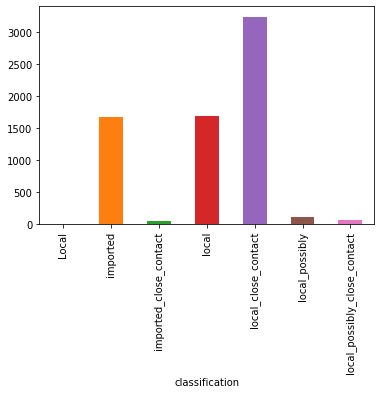

In [53]:
ax = city_case.plot.bar()

# New case

In [6]:
df_today_fil = data_master['confirmation_date']=='2020-12-16'
df_today = data_master[df_today_fil]
df_today

,enabled,case_no,onset_date,confirmation_date,gender,age,hospital_zh,hospital_en,status,status_zh,...,citizenship_en,citizenship_district_zh,citizenship_district_en,classification,classification_zh,classification_en,detail_zh,detail_en,source_url_1,source_url_2
7725,Y,7723.0,none,2020-12-16,M,41,NaN,NaN,NaN,NaN,...,Uncertain,不明,Uncertain,imported,輸入個案,Imported,患者由烏克蘭抵港，沒有病徵。,The patient arrived in Hong Kong from Ukraine ...,https://gia.info.gov.hk/general/202012/16/P202...,NaN
7726,Y,7724.0,2020-12-14,2020-12-16,F,41,NaN,NaN,NaN,NaN,...,Cheung Sha Wan,深水埗,Sham Shui Po,local_close_contact,本地個案的密切接觸者,Close contact of local case,患者居於長沙灣蘇屋邨櫻桃樓，無外遊紀錄，12 月 14 日出現症狀。,"The patient resides at Cherry House, So Uk Est...",https://gia.info.gov.hk/general/202012/16/P202...,NaN
7727,Y,7725.0,2020-12-13,2020-12-16,M,88,NaN,NaN,NaN,NaN,...,Yau Tong,觀塘,Kwun Tong,local,本地個案,Local,患者居於油塘高怡邨高遠樓，無外遊紀錄，12 月 13 日出現症狀。,"The patient resides at Ko Yuen House, Ko Yee E...",https://gia.info.gov.hk/general/202012/16/P202...,NaN
7728,Y,7726.0,2020-12-14,2020-12-16,F,50,NaN,NaN,NaN,NaN,...,Tung Chung,離島,Islands,local_close_contact,本地個案的密切接觸者,Close contact of local case,患者居於東涌海堤灣畔 5 座，無外遊紀錄，12 月 13 日出現症狀。,"The patient resides at Block 5, Seaview Cresce...",https://gia.info.gov.hk/general/202012/16/P202...,NaN
7729,Y,7727.0,2020-12-15,2020-12-16,F,24,NaN,NaN,NaN,NaN,...,Tsing Yi,葵青,Kwai Tsing,local_close_contact,本地個案的密切接觸者,Close contact of local case,患者居於青衣長宏邨宏善樓，無外遊紀錄，12 月 15 日出現症狀。,"The patient resides at Wang Sin House, Cheung ...",https://gia.info.gov.hk/general/202012/16/P202...,NaN
7730,Y,7728.0,none,2020-12-16,F,53,NaN,NaN,NaN,NaN,...,Sau Mau Ping,觀塘,Kwun Tong,local,本地個案,Local,患者居於秀茂坪寶達邨達怡樓，無外遊紀錄，沒有病徵。,"The patient resides at Tat Yi House, Po Tat Es...",https://gia.info.gov.hk/general/202012/16/P202...,NaN
7731,Y,7729.0,2020-11-29,2020-12-16,M,45,NaN,NaN,NaN,NaN,...,Hung Hom,九龍城,Kowloon City,local_close_contact,本地個案的密切接觸者,Close contact of local case,患者居於紅磡黃埔花園銀竹苑 7 座，無外遊紀錄，11 月 29 日出現症狀。,"The patient resides at Block 7, Bamboo Mansion...",https://gia.info.gov.hk/general/202012/16/P202...,NaN
7732,Y,7730.0,2020-12-08,2020-12-16,F,30,NaN,NaN,NaN,NaN,...,Wong Tai Sin,黃大仙,Wong Tai Sin,local_close_contact,本地個案的密切接觸者,Close contact of local case,患者居於黃大仙沙田坳邨順田樓，無外遊紀錄，12 月 8 日出現症狀。,"The patient resides at Shun Tin House, Shatin ...",https://gia.info.gov.hk/general/202012/16/P202...,NaN
7733,Y,7731.0,2020-12-14,2020-12-16,M,62,NaN,NaN,NaN,NaN,...,Wong Tai Sin,黃大仙,Wong Tai Sin,local_close_contact,本地個案的密切接觸者,Close contact of local case,患者居於黃大仙沙田坳邨順田樓，無外遊紀錄，12 月 14 日出現症狀。,"The patient resides at Shun Tin House, Shatin ...",https://gia.info.gov.hk/general/202012/16/P202...,NaN
7734,Y,7732.0,2020-12-12,2020-12-16,M,30,NaN,NaN,NaN,NaN,...,Ma On Shan,沙田,Sha Tin,local_close_contact,本地個案的密切接觸者,Close contact of local case,患者居於馬鞍山利安邨利興樓，無外遊紀錄，12 月 12 日出現症狀。,"The patient resides at Lee Hing House, Lee On ...",https://gia.info.gov.hk/general/202012/16/P202...,NaN


In [7]:
df_by_date = data_master.loc[:, ['confirmation_date']] 
by_date = df_by_date.groupby('confirmation_date').size()

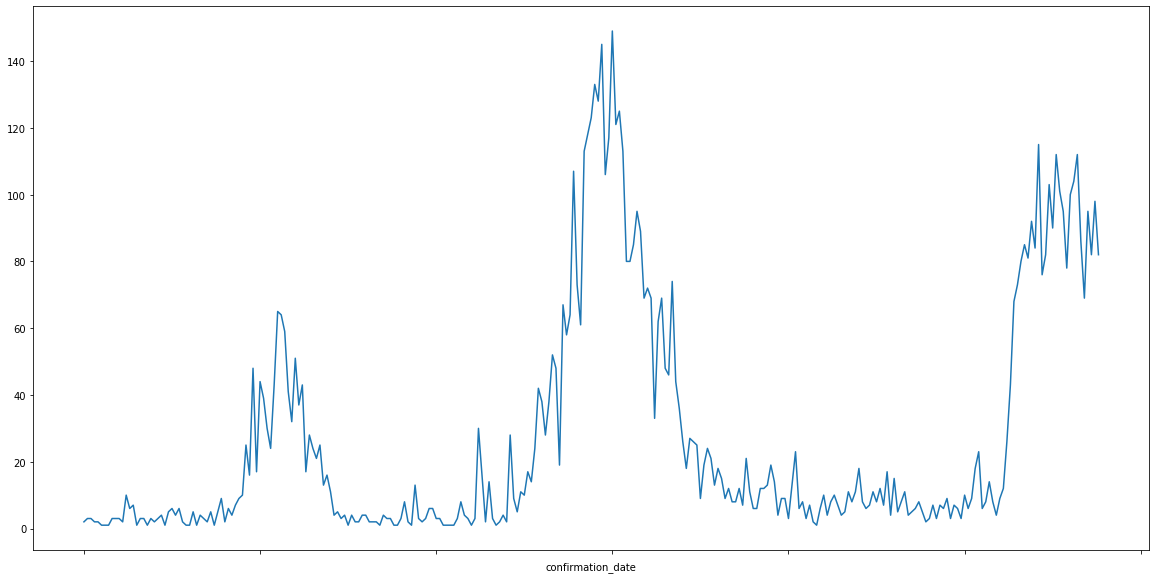

In [8]:
ax = by_date.plot.line(figsize=[20,10])

## Location

In [9]:
data_loc = pd.read_csv(highrisk_fname, encoding='utf8') 
# Preview the first 5 lines of the loaded data 
data_loc.head()

,enabled,case_no,start_date,start_time_period,end_date,end_time_period,type,vlookup_homedistrict_zh,sub_district_zh,sub_district_en,...,action_zh,action_en,remarks_zh,remarks_en,lat,lng,source_url_1,source_url_2,source_file_date,source_file_type
0,Y,1,2020-01-21,evening,2020-01-21,NaN,self,武漢,佐敦,Jordan,...,抵港,Arrival,1 月 21 日起出現發燒及鼻塞，被發現發燒，即時被送往醫院,Developed fever and blocked nose since Jan 21;...,22.303574,114.165009,https://news.rthk.hk/rthk/ch/component/k2/1504...,https://www.hongkongfp.com/2020/01/22/breaking...,NaN,NaN
1,Y,1,2020-01-21,afternoon,2020-01-21,NaN,self,武漢,-,-,...,交通,Transport,由武漢到深圳北（三號車廂 10D 座位）,"From Wuhan to Shenzhenbei (carriage no. 3, sea...",22.303574,114.165009,https://news.rthk.hk/rthk/ch/component/k2/1504...,https://www.scmp.com/print/news/hong-kong/heal...,NaN,NaN
2,Y,1,2020-01-21,afternoon,2020-01-21,NaN,self,武漢,-,-,...,交通,Transport,由深圳北到香港（二號車廂 2D 座位）,"From Shenzhenbei to Hong Kong (carriage no. 2,...",22.303574,114.165009,https://news.rthk.hk/rthk/ch/component/k2/1504...,https://www.scmp.com/print/news/hong-kong/heal...,NaN,NaN
3,N,1,2020-01-21,evening,2020-01-21,NaN,relatives,武漢,佐敦,Jordan,...,抵港,Arrival,NaN,NaN,22.303574,114.165009,https://news.rthk.hk/rthk/ch/component/k2/1504...,https://www.hongkongfp.com/2020/01/22/breaking...,NaN,NaN
4,Y,1,2020-01-21,night,2020-01-22,NaN,relatives,武漢,尖沙咀,Tsim Sha Tsui,...,住宿,Accommodation,患者與妻子、兩名兒子及外母同行，患者家屬入住尖沙咀皇悅酒店。,"The patient travelled with his wife, two sons ...",22.301026,114.175148,https://news.rthk.hk/rthk/ch/component/k2/1504...,https://www.hongkongfp.com/2020/01/22/breaking...,NaN,NaN


C:\Users\ymlai\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ymlai\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ymlai\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ymlai\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26126 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ymlai\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ymlai\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20061 missing from c

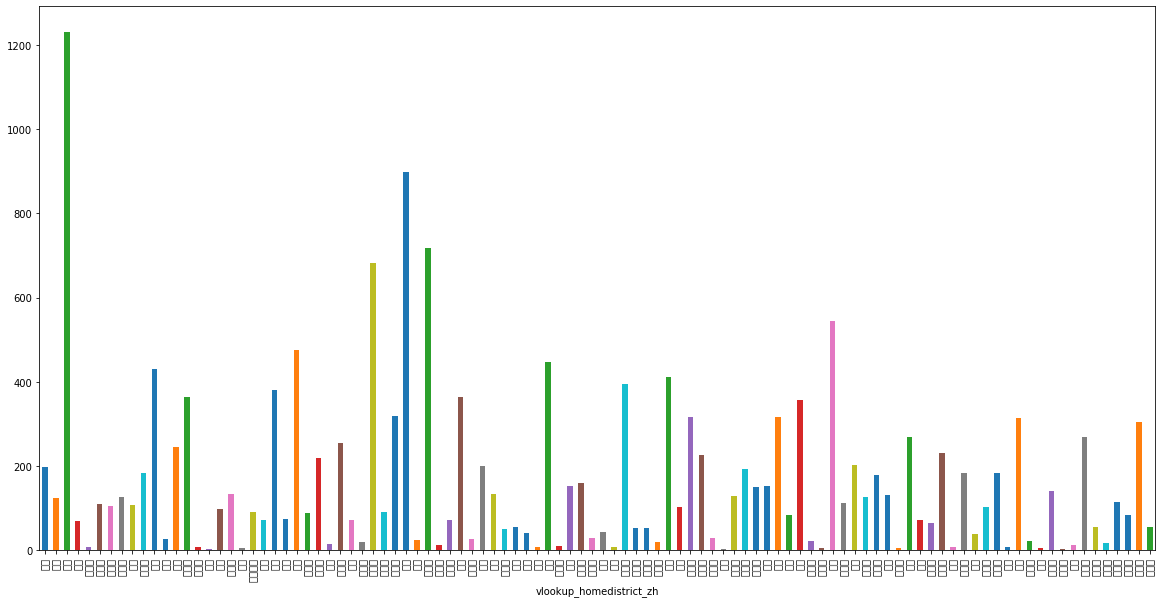

In [154]:
df_dist_group = data_loc.loc[:, ['vlookup_homedistrict_zh']]
dist_case = df_dist_group.groupby('vlookup_homedistrict_zh').size()
ax = dist_case.plot.bar(figsize=[20,10])

# Visualize data


1st we want to visualize the infected number, a bar chart should be ok

1. unlink
2. linked
3. from outside

2nd we want to create a heat map for the whole hong kong, sliding 14 days

In [10]:

loc_center = {
    "Hong Kong": [22.350627,114.1849161],
    "Central and Western": [22.2748365,114.14873730393252],
    "Eastern": [22.2730777,114.23359377341592],
    "Southern": [22.2192627,114.22522984854672],
    "Wan Chai": [22.27394695,114.18174874679013],
    "Kowloon City": [22.32179955,114.18859418638175],
    "Kwun Tong": [22.308648599999998,114.22766104671223],
    "Sham Shui Po": [22.33125395,114.15932119657994],
    "Wong Tai Sin": [22.34432185,114.20215028440833],
    "Yau Tsim Mong": [22.3074036,114.16552591155013],
    "Islands": [22.23007565,113.98678546827477],
    "Kwai Tsing": [22.34101175,114.10428534268473],
    "North": [22.516949349999997,114.21359265126003],
    "Sai Kung": [22.3070096,114.37134533899689],
    "Sha Tin": [22.39157275,114.20809762908664],
    "Tai Po": [22.480971150000002,114.30410296970287],
    "Tsuen Wan": [22.364986950000002,114.07768836682578],
    "Tuen Mun": [22.3788404,113.95282979560184],
    "Yuen Long": [22.45729575,114.02131879795456],    
}

In [17]:
def loc_time_range(center, df, start, end, zoom=11):
 
    is_last_14 = (df['end_date'] >= start.strftime("%Y-%m-%d")) & (df['end_date'] <= end.strftime("%Y-%m-%d")) & df['lat'].notnull()& df['lng'].notnull() 
    last_14_df = df[is_last_14]

    df1 = last_14_df[['lat', 'lng']].values.tolist()
    
    fmap = folium.Map(center, zoom_start=zoom, )
    fmap.add_child(HeatMap(data=df1, radius=10, blur=10))
    
    return fmap


In [72]:
def drawHeatMap(df, center, title, json_url, zoom=11):

    df1 = df[['lat', 'lng']].values.tolist()
    
    fmap = folium.Map(center, zoom_start=zoom, )
    fmap.add_child(folium.GeoJson(json_url, name='geojson' )) #.add_to(fmap)
    fmap.add_child(HeatMap(data=df1, radius=10, blur=10))
    
    fmap.caption = title
    
    title_html = '<h3 align="center" style="font-size:20px"><b>' + title + '</b></h3>'
    fmap.get_root().html.add_child(folium.Element(title_html))

    return fmap

In [60]:
def filter_distict_time_range(df, distict, start, end):
 
    is_last_14 = (df["real_distict"] == distict) & (df['end_date'] >= start.strftime("%Y-%m-%d")) & (df['end_date'] <= end.strftime("%Y-%m-%d")) & df['lat'].notnull()& df['lng'].notnull() 
    last_14_df = df[is_last_14]
    
    return last_14_df

In [18]:
day14 = datetime.today() - timedelta(days=14)

hk_center_pos = loc_center["Hong Kong"]
# print(hk_center_pos)
fmap = loc_time_range(hk_center_pos, data_loc, day14, datetime.today())

fmap

In [58]:
# Central and Western
hk_center_pos = loc_center["Central and Western"]
data_loc_cw = filter_distict_time_range(data_loc, "Central and Western", day14, datetime.today())


In [76]:
loc = "Central and Western"
hk_center_pos = loc_center[loc]
data_loc_cw = filter_distict_time_range(data_loc, loc, day14, datetime.today())
title = "# case in " + loc + " in past 14 days: " + str(len(data_loc_cw))
fmap = drawHeatMap(data_loc_cw, hk_center_pos, title, "geodata/Central and Western.txt", 14)

fmap

In [77]:
# Eastern

loc = "Eastern"
hk_center_pos = loc_center[loc]
data_loc_cw = filter_distict_time_range(data_loc, loc, day14, datetime.today())
title = "# case in " + loc + " in past 14 days: " + str(len(data_loc_cw))
fmap = drawHeatMap(data_loc_cw, hk_center_pos, title, "geodata/" + loc + ".txt", 14)

fmap

In [79]:
# Islands

loc = "Islands"
hk_center_pos = loc_center[loc]
data_loc_cw = filter_distict_time_range(data_loc, loc, day14, datetime.today())
title = "# case in " + loc + " in past 14 days: " + str(len(data_loc_cw))
fmap = drawHeatMap(data_loc_cw, hk_center_pos, title, "geodata/" + loc + ".txt", 12)

fmap

In [82]:
# Kowloon City

loc = "Kowloon City"
hk_center_pos = loc_center[loc]
data_loc_cw = filter_distict_time_range(data_loc, loc, day14, datetime.today())
title = "# case in " + loc + " in past 14 days: " + str(len(data_loc_cw))
fmap = drawHeatMap(data_loc_cw, hk_center_pos, title, "geodata/" + loc + ".txt", 13)

fmap

In [83]:
# Kwai Tsing
loc = "Kwai Tsing"
hk_center_pos = loc_center[loc]
data_loc_cw = filter_distict_time_range(data_loc, loc, day14, datetime.today())
title = "# case in " + loc + " in past 14 days: " + str(len(data_loc_cw))
fmap = drawHeatMap(data_loc_cw, hk_center_pos, title, "geodata/" + loc + ".txt", 13)

fmap

In [85]:
# Kwun Tong

loc = "Kwun Tong"
hk_center_pos = loc_center[loc]
data_loc_cw = filter_distict_time_range(data_loc, loc, day14, datetime.today())
title = "# case in " + loc + " in past 14 days: " + str(len(data_loc_cw))
fmap = drawHeatMap(data_loc_cw, hk_center_pos, title, "geodata/" + loc + ".txt", 14)

fmap

In [86]:
# North

loc = "North"
hk_center_pos = loc_center[loc]
data_loc_cw = filter_distict_time_range(data_loc, loc, day14, datetime.today())
title = "# case in " + loc + " in past 14 days: " + str(len(data_loc_cw))
fmap = drawHeatMap(data_loc_cw, hk_center_pos, title, "geodata/" + loc + ".txt", 12)

fmap

In [111]:
# Sai Kung

loc = "Sai Kung"
hk_center_pos = loc_center[loc]
data_loc_cw = filter_distict_time_range(data_loc, loc, day14, datetime.today())
title = "# danger location in " + loc + " in past 14 days: " + str(len(data_loc_cw))
fmap = drawHeatMap(data_loc_cw, hk_center_pos, title, "geodata/" + loc + ".txt", 12)

fmap

In [113]:
# Sha Tin

loc = "Sha Tin"
hk_center_pos = loc_center[loc]
data_loc_cw = filter_distict_time_range(data_loc, loc, day14, datetime.today())
title = "# danger zone in " + loc + " in past 14 days: " + str(len(data_loc_cw))
fmap = drawHeatMap(data_loc_cw, hk_center_pos, title, "geodata/" + loc + ".txt", 13)

fmap

In [110]:
img_data = fmap._to_png()
img = Image.open(io.BytesIO(img_data))
img.save('test_shatin_image.png')

In [91]:
# Sham Shui Po

loc = "Sham Shui Po"
hk_center_pos = loc_center[loc]
data_loc_cw = filter_distict_time_range(data_loc, loc, day14, datetime.today())
title = "# case in " + loc + " in past 14 days: " + str(len(data_loc_cw))
fmap = drawHeatMap(data_loc_cw, hk_center_pos, title, "geodata/" + loc + ".txt", 14)

fmap

In [93]:
# Southern

loc = "Southern"
hk_center_pos = loc_center[loc]
data_loc_cw = filter_distict_time_range(data_loc, loc, day14, datetime.today())
title = "# case in " + loc + " in past 14 days: " + str(len(data_loc_cw))
fmap = drawHeatMap(data_loc_cw, hk_center_pos, title, "geodata/" + loc + ".txt", 13)

fmap

In [96]:
# Tai Po
# Change the center?

loc = "Tai Po"
hk_center_pos = loc_center[loc]
data_loc_cw = filter_distict_time_range(data_loc, loc, day14, datetime.today())
title = "# case in " + loc + " in past 14 days: " + str(len(data_loc_cw))
fmap = drawHeatMap(data_loc_cw, hk_center_pos, title, "geodata/" + loc + ".txt", 12)

fmap

In [101]:
# Tsuen Wan

loc = "Tsuen Wan"
hk_center_pos = loc_center[loc]
data_loc_cw = filter_distict_time_range(data_loc, loc, day14, datetime.today())
title = "# case in " + loc + " in past 14 days: " + str(len(data_loc_cw))
fmap = drawHeatMap(data_loc_cw, hk_center_pos, title, "geodata/" + loc + ".txt", 13)

fmap

In [102]:
# Tuen Mun

loc = "Tuen Mun"
hk_center_pos = loc_center[loc]
data_loc_cw = filter_distict_time_range(data_loc, loc, day14, datetime.today())
title = "# case in " + loc + " in past 14 days: " + str(len(data_loc_cw))
fmap = drawHeatMap(data_loc_cw, hk_center_pos, title, "geodata/" + loc + ".txt", 13)

fmap

In [104]:
# Wan Chai
loc = "Wan Chai"
hk_center_pos = loc_center[loc]
data_loc_cw = filter_distict_time_range(data_loc, loc, day14, datetime.today())
title = "# case in " + loc + " in past 14 days: " + str(len(data_loc_cw))
fmap = drawHeatMap(data_loc_cw, hk_center_pos, title, "geodata/" + loc + ".txt", 14)

fmap

In [105]:
# Wong Tai Sin
loc = "Wong Tai Sin"
hk_center_pos = loc_center[loc]
data_loc_cw = filter_distict_time_range(data_loc, loc, day14, datetime.today())
title = "# case in " + loc + " in past 14 days: " + str(len(data_loc_cw))
fmap = drawHeatMap(data_loc_cw, hk_center_pos, title, "geodata/" + loc + ".txt", 14)

fmap

In [106]:
# Yau Tsim Mong

loc = "Yau Tsim Mong"
hk_center_pos = loc_center[loc]
data_loc_cw = filter_distict_time_range(data_loc, loc, day14, datetime.today())
title = "# case in " + loc + " in past 14 days: " + str(len(data_loc_cw))
fmap = drawHeatMap(data_loc_cw, hk_center_pos, title, "geodata/" + loc + ".txt", 14)

fmap

In [107]:
# Yuen Long

loc = "Yuen Long"
hk_center_pos = loc_center[loc]
data_loc_cw = filter_distict_time_range(data_loc, loc, day14, datetime.today())
title = "# case in " + loc + " in past 14 days: " + str(len(data_loc_cw))
fmap = drawHeatMap(data_loc_cw, hk_center_pos, title, "geodata/" + loc + ".txt", 13)

fmap

In [12]:


range_start = datetime(2020, 2, 1)
range_end = datetime(2020, 12, 3)

for end_date in daterange(range_start, range_end):
    start_date = end_date - timedelta(14)
    fmap = loc_time_range(start_date, end_date)
    img_data = fmap._to_png()
    img = Image.open(io.BytesIO(img_data))
    img.save(start_date.strftime("%Y-%m-%d") + 'image.png')

# Map case to each polygon

## Read polygon

In [25]:
with open("geodata/Central and Western.txt") as f:
    features = json.load(f)
p_Central_and_Western = shape(features)

with open("geodata/Eastern.txt") as f:
    features = json.load(f)
p_Eastern = shape(features)

with open("geodata/Southern.txt") as f:
    features = json.load(f)
p_Southern = shape(features)

with open("geodata/Wan Chai.txt") as f:
    features = json.load(f)
p_Wan_Chai = shape(features)

with open("geodata/Kowloon City.txt") as f:
    features = json.load(f)
p_Kowloon_City = shape(features)

with open("geodata/Kwun Tong.txt") as f:
    features = json.load(f)
p_Kwun_Tong = shape(features)

with open("geodata/Sham Shui Po.txt") as f:
    features = json.load(f)
p_Sham_Shui_Po = shape(features)

with open("geodata/Wong Tai Sin.txt") as f:
    features = json.load(f)
p_Wong_Tai_Sin = shape(features)

with open("geodata/Yau Tsim Mong.txt") as f:
    features = json.load(f)
p_Yau_Tsim_Mong = shape(features)

with open("geodata/Islands.txt") as f:
    features = json.load(f)
p_Islands = shape(features)

with open("geodata/Kwai Tsing.txt") as f:
    features = json.load(f)
p_Kwai_Tsing = shape(features)

with open("geodata/North.txt") as f:
    features = json.load(f)
p_North = shape(features)

with open("geodata/Sai Kung.txt") as f:
    features = json.load(f)
p_Sai_Kung = shape(features)

with open("geodata/Sha Tin.txt") as f:
    features = json.load(f)
p_Sha_Tin = shape(features)

with open("geodata/Tai Po.txt") as f:
    features = json.load(f)
p_Tai_Po = shape(features)

with open("geodata/Tsuen Wan.txt") as f:
    features = json.load(f)
p_Tsuen_Wan = shape(features)

with open("geodata/Tuen Mun.txt") as f:
    features = json.load(f)
p_Tuen_Mun = shape(features)

with open("geodata/Yuen Long.txt") as f:
    features = json.load(f)
p_Yuen_Long = shape(features)

In [26]:
# point = Point(45.4519896, -122.7924463)
# if polyg.contains(point):
#        print ('Found containing polygon:', feature)

def findDistrict(point):
    
    if p_Central_and_Western.contains(point):
        return "Central and Western"
    elif p_Eastern.contains(point):
        return "Eastern"
    elif p_Southern.contains(point):
        return "Southern"
    elif p_Wan_Chai.contains(point):
        return "Wan Chai"
    elif p_Kowloon_City.contains(point):
        return "Kowloon City"
    elif p_Kwun_Tong.contains(point):
        return "Kwun Tong"
    elif p_Sham_Shui_Po.contains(point):
        return "Sham Shui Po"
    elif p_Wong_Tai_Sin.contains(point):
        return "Wong Tai Sin"
    elif p_Yau_Tsim_Mong.contains(point):
        return "Yau Tsim Mong"
    elif p_Islands.contains(point):
        return "Islands"
    elif p_Kwai_Tsing.contains(point):
        return "Kwai Tsing"
    elif p_North.contains(point):
        return "North"
    elif p_Sai_Kung.contains(point):
        return "Sai Kung"
    elif p_Sha_Tin.contains(point):
        return "Sha Tin"
    elif p_Tai_Po.contains(point):
        return "Tai Po"
    elif p_Tsuen_Wan.contains(point):
        return "Tsuen Wan"
    elif p_Tuen_Mun.contains(point):
        return "Tuen Mun"
    elif p_Yuen_Long.contains(point):
        return "Yuen Long"
    else:
        return "Unknown"

In [27]:
p_Yau_Tsim_Mong.contains(Point(114.165009, 22.303574) )

True

In [28]:
data_loc['real_distict'] = 'other'

for index, row in data_loc.iterrows():
    data_loc.set_value(index,'real_distict',findDistrict(Point(row['lng'], row['lat'])))

C:\Users\ymlai\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [169]:
data_loc.head()

,enabled,case_no,start_date,start_time_period,end_date,end_time_period,type,vlookup_homedistrict_zh,sub_district_zh,sub_district_en,...,action_en,remarks_zh,remarks_en,lat,lng,source_url_1,source_url_2,source_file_date,source_file_type,real_distict
0,Y,1,2020-01-21,evening,2020-01-21,NaN,self,武漢,佐敦,Jordan,...,Arrival,1 月 21 日起出現發燒及鼻塞，被發現發燒，即時被送往醫院,Developed fever and blocked nose since Jan 21;...,22.303574,114.165009,https://news.rthk.hk/rthk/ch/component/k2/1504...,https://www.hongkongfp.com/2020/01/22/breaking...,NaN,NaN,Yau Tsim Mong
1,Y,1,2020-01-21,afternoon,2020-01-21,NaN,self,武漢,-,-,...,Transport,由武漢到深圳北（三號車廂 10D 座位）,"From Wuhan to Shenzhenbei (carriage no. 3, sea...",22.303574,114.165009,https://news.rthk.hk/rthk/ch/component/k2/1504...,https://www.scmp.com/print/news/hong-kong/heal...,NaN,NaN,Yau Tsim Mong
2,Y,1,2020-01-21,afternoon,2020-01-21,NaN,self,武漢,-,-,...,Transport,由深圳北到香港（二號車廂 2D 座位）,"From Shenzhenbei to Hong Kong (carriage no. 2,...",22.303574,114.165009,https://news.rthk.hk/rthk/ch/component/k2/1504...,https://www.scmp.com/print/news/hong-kong/heal...,NaN,NaN,Yau Tsim Mong
3,N,1,2020-01-21,evening,2020-01-21,NaN,relatives,武漢,佐敦,Jordan,...,Arrival,NaN,NaN,22.303574,114.165009,https://news.rthk.hk/rthk/ch/component/k2/1504...,https://www.hongkongfp.com/2020/01/22/breaking...,NaN,NaN,Yau Tsim Mong
4,Y,1,2020-01-21,night,2020-01-22,NaN,relatives,武漢,尖沙咀,Tsim Sha Tsui,...,Accommodation,患者與妻子、兩名兒子及外母同行，患者家屬入住尖沙咀皇悅酒店。,"The patient travelled with his wife, two sons ...",22.301026,114.175148,https://news.rthk.hk/rthk/ch/component/k2/1504...,https://www.hongkongfp.com/2020/01/22/breaking...,NaN,NaN,Yau Tsim Mong


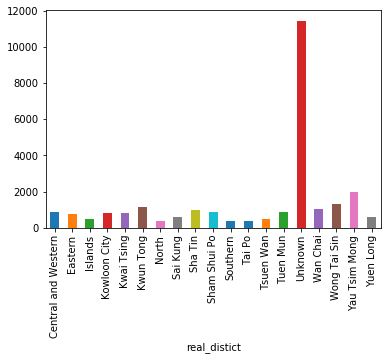

In [170]:
df_dist2_group = data_loc.loc[:, ['real_distict']]
dist2_case = df_dist2_group.groupby('real_distict').size()
ax = dist2_case.plot.bar()

In [171]:
is_unk= data_loc['real_distict']=='Unknown'
df_dist_unk = data_loc[is_unk]

df_dist_unk

,enabled,case_no,start_date,start_time_period,end_date,end_time_period,type,vlookup_homedistrict_zh,sub_district_zh,sub_district_en,...,action_en,remarks_zh,remarks_en,lat,lng,source_url_1,source_url_2,source_file_date,source_file_type,real_distict
31,Y,6,2020-01-23,NaN,2020-01-23,NaN,self,北角,境外,Outside HK,...,Stay,NaN,NaN,NaN,NaN,https://www.thestandnews.com/politics/%E6%AD%A...,https://www.hk01.com/%E7%A4%BE%E6%9C%83%E6%96%...,NaN,NaN,Unknown
86,Y,14,2020-01-17,afternoon,2020-01-20,NaN,self,葵涌,境外,Outside HK,...,Stay,1 月 19 日起出現咳嗽,Developed cough since Jan 19,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
146,Y,25,2020-02-05,NaN,2020-02-05,NaN,self,上水,境外,Outside HK,...,Stay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
151,Y,25,2020-02-05,NaN,2020-02-05,NaN,self,上水,-,-,...,Transport,與第 62 宗患者於下午 5 時乘坐同一輛巴士,Took the same bus with patient no. 62 at 5pm,NaN,NaN,https://www.thestandnews.com/society/%E6%AD%A6...,https://www.thestandard.com.hk/breaking-news/s...,NaN,NaN,Unknown
197,Y,42,2020-01-18,NaN,2020-01-19,NaN,self,青衣,境外,Outside HK,...,Stay,NaN,NaN,NaN,NaN,https://www.hk01.com/%E7%A4%BE%E6%9C%83%E6%96%...,https://hk.news.appledaily.com/local/20200211/...,NaN,NaN,Unknown
249,Y,59,2020-01-30,NaN,2020-02-01,NaN,self,慈雲山,境外,Outside HK,...,Stay,NaN,NaN,NaN,NaN,https://www.hk01.com/%E7%A4%BE%E6%9C%83%E6%96%...,https://news.mingpao.com/ins/%e6%b8%af%e8%81%9...,NaN,NaN,Unknown
257,Y,62,2020-01-23,NaN,2020-02-02,NaN,self,牛頭角,境外,Outside HK,...,Stay,NaN,NaN,NaN,NaN,https://news.rthk.hk/rthk/ch/component/k2/1509...,https://www.thestandard.com.hk/breaking-news/s...,NaN,NaN,Unknown
258,Y,62,2020-02-05,NaN,2020-02-05,NaN,self,牛頭角,境外,Outside HK,...,Work,NaN,NaN,NaN,NaN,https://news.rthk.hk/rthk/ch/component/k2/1509...,https://www.thestandard.com.hk/breaking-news/s...,NaN,NaN,Unknown
262,Y,62,2020-02-05,NaN,2020-02-05,NaN,self,牛頭角,境外,Outside HK,...,Transport,與第 25 宗患者於下午 5 時乘坐同一輛巴士,Took the same bus with patient no. 25 at 5pm,NaN,NaN,https://www.thestandnews.com/society/%E6%AD%A6...,https://www.thestandard.com.hk/breaking-news/s...,NaN,NaN,Unknown
278,Y,66,2020-01-14,NaN,2020-01-25,NaN,self,屯門,境外,Outside HK,...,Stay,曾 6 次經羅湖即日來回樟木頭及香港，於當地與朋友相聚,Paid 6 day trips to Zhangmutou via Lo Wu Contr...,NaN,NaN,https://news.mingpao.com/pns/%E8%A6%81%E8%81%9...,https://hk.appledaily.com/local/20200220/IAZDI...,NaN,NaN,Unknown


# Create a age group, day excel port

* csv format
* date is from 2020-02-01 to today
* accumulative, so simple just loop through the case

In [12]:
range_start = datetime(2020, 2, 1)
range_end = datetime(2020, 12, 7)

age_group = [0,0,0,0,0,0,0,0,0,0,0]

f = open("age_group.txt", "w", encoding='UTF-8')

for date in daterange(range_start, range_end):
    is_today = data_master['confirmation_date'] == (date.strftime("%Y-%m-%d"))
    df_date = data_master[is_today]
    
    f.write(date.strftime("%Y-%m-%d"))
    f.write(",")
    
    for index, row in df_date.iterrows():
        b = int(row['age'] / 10)
        age_group[b] += 1
        
    for cnt in age_group:
        f.write(str(cnt))
        f.write(",")

    f.write("\n")
    
f.close()

# Create animation